# Sistema de cálculo de propina

En el siguiente ejemplo se quiere crear un sistema experto que calcule el porcentaje correcto de propina dependiendo de los factores de calidad de la comida y el tipo de servicio recibido.


In [3]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt

## Antecendentes

Los antecedentes serán aquellos valores difusos utilizados como valores de entrada en el sistema.

En este caso los antecendentes serán la <b>calidad de comida</b> y el <b>servicio</b>.

Para definir los antecendentes del sistema es necesario especificar su <b>dominio</b> y su <b>nombre</b>.

Para cada antecedente es necesario especificar las diferentes <b>clases</b> representadas como números difusos.

### Calidad

La calidad de la comida será evaluada con valores de <b>1 a 10</b>.

Este rango de números será nuestro dominio.

In [4]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')

La calidad de la comida será clasificada en:

- Buena
- Promedio 
- Mala

Estos valores estarán distribuidos utilizando una <b>función triangular</b>.

/home/andy/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


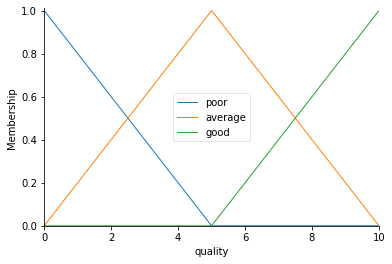

In [11]:
#quality.automf(3)
quality['poor'] = fuzz.trimf(quality.universe, [0, 0, 5])
quality['average'] = fuzz.trimf(quality.universe, [0, 5, 10])
quality['good'] = fuzz.trimf(quality.universe, [5, 10, 10])

#Gráfico
quality.view()
#plt.savefig('/tmp/image.png') #Para guardar imagen

### Servicio

El servicio será evaluado con valores de <b>1 a 10</b>.

Este rango de números será nuestro dominio.

In [12]:
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')

El tipo de servicio será clasificado en:

- Buen
- Promedio 
- Malo

Estos valores estarán distribuidos utilizando una <b>función triangular</b>.

/home/andy/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


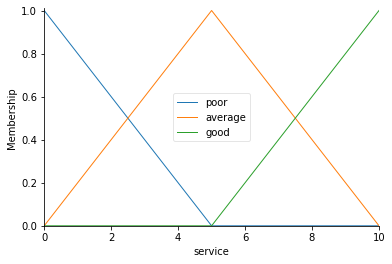

In [13]:
service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])

#service.automf(3)

#Gráfico
service.view()
#plt.savefig('/tmp/image.png') #Para guardar imagen

## Consecuente

Los consecuentes son aquellos valores difusos que se obtendran como salida del sistema.

Al igual que los antecendentes deben tener especificado su <b>dominio</b> y su <b>nombre</b>.

### Propina

El valor del porcentaje de la propina oscilará entre 1% y 25%.

Este rango de números será nuestro dominio.

In [14]:
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

La propina será clasificada como:

- Baja
- Media
- Alta

Estos valores estarán distribuidos utilizando una función triangular.


/home/andy/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


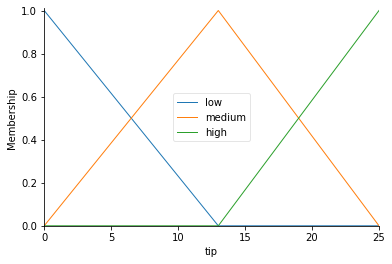

In [15]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

tip.view()

## Reglas

Ahora que los antecendentes y consecuentes han sido definidos es necesario definir las reglas que usará el sistema para tomar decisiones.

Las reglas para este caso serán:

- Si la calidad de la comida es <b>mala</b> <b>O</b> el servicio es <b>malo</b>. entonces la propina será <b>baja</b>
- Si el servicio es <b>promedio</b>, entonces la propina será <b>media</b>
- Si la calidad de la comida es <b>buena O</b> el servicio es <b>bueno</b> entonces, la propina será <b>alta</b>

In [26]:
#Selección de método de defuzz
tip.defuzzify_method = 'bisector'
rules = []
rules.append(ctrl.Rule(quality['poor'] | service['poor'], tip['low']))
rules.append(ctrl.Rule(service['average'], tip['medium']))
rules.append(ctrl.Rule(service['good'] | quality['good'], tip['high']))

## Simulación de sistema de control

Para obtener el resultado correspondiente a un conjunto de valores de entrada es necesario crear una simulación del sistema de control planteado y darle valores de entrada.

 Antecedents 
Antecedent: quality                 = 3
  - poor                            : 0.4
  - average                         : 0.6
  - good                            : 0.0
Antecedent: service                 = 10
  - poor                            : 0.0
  - average                         : 0.0
  - good                            : 1.0

 Rules 
RULE #0:
  IF quality[poor] OR service[poor] THEN tip[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - quality[poor]                                          : 0.4
  - service[poor]                                          : 0.0
                            quality[poor] OR service[poor] = 0.4
  Activation (THEN-clause):
                                                  tip[low] : 0.4

RULE #1:
  IF service[average] THEN tip[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - service[average]                                       :

/home/andy/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


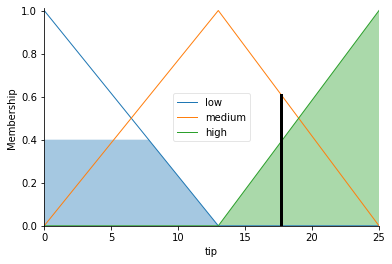

In [30]:
ctrSys = ctrl.ControlSystem(rules)
tipping = ctrl.ControlSystemSimulation(ctrSys)

tipping.input['quality'] = 3
tipping.input['service'] = 10
tipping.compute()
tipping.print_state() #Archivo control/controlsystem.py modificado
tip.view(sim=tipping)
print("Resultado:"+str(tipping.output['tip']))

 - Probar para diferentes valores
 - ¿Cómo cambia el resultados al modificar el método de defuzz?
 - ¿Qué método sería mejor para este problema?